## 🚢 Phase 1: Setup & CSV Exploration

### ✅ Step 1: Load Data

- Load `train.csv` and `test.csv` using `pandas`.
- Preview the data using `.head()`.

### ✅ Step 2: Inspect Data

- Use `.info()` to check column types and nulls.
- Use `.describe()` for summary statistics.
- Use `.isnull().sum()` to count missing values in each column.

### ✅ Step 3: Basic Visualizations

- Use `seaborn` and `matplotlib` for initial charts.
- Visualize survival counts, survival by sex, and survival by passenger class.
- G


In [22]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')  #loading the data

#first 5 data cells :-

print("train csv: ")
print(train.head())

print("\ntest csv: ")
print(train.head())

train csv: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [23]:
print("Train Data Info:")
train.info()

print("\nTest Data Info:")
test.info()


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418

In [24]:
print("train data description")
print(train.describe())

train data description
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [25]:
#chceking missing values in test and train dataset

print("missing values in train set")
print(train.isnull().sum())

print("\nmissing values in test set")
print(test.isnull().sum())

#shows us that many datasets of cbin and age are missing which arer crutial

missing values in train set
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing values in test set
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [26]:
import seaborn as sns #for Stylish & easy statistical plots
import matplotlib.pyplot as plt # Core Python plotting tool

<function matplotlib.pyplot.show(close=None, block=None)>

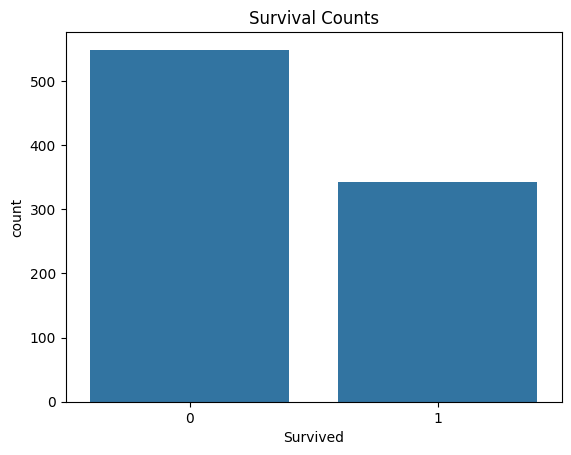

In [27]:
sns.countplot(x='Survived', data = train) #plots graph for survived column 0 = didnt survived , 1 = survived
plt.title("Survival Counts")
plt.show

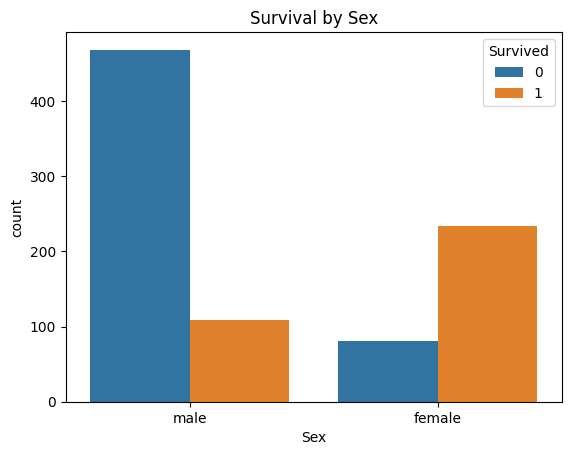

In [28]:
sns.countplot(x='Sex', hue='Survived', data=train)  # hue adds colour to the 1 values (survived) of the survive column
plt.title("Survival by Sex")
plt.show()


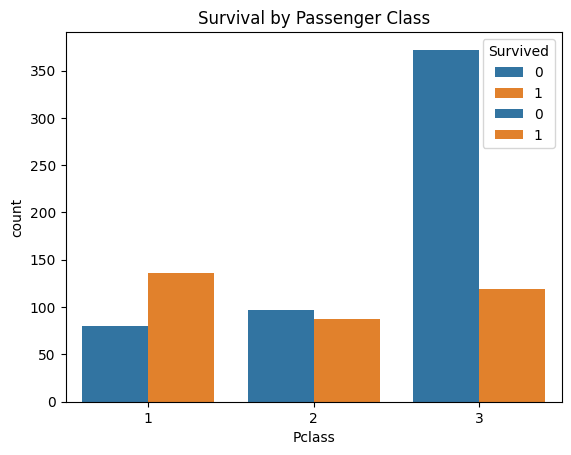

'Why it matters?\nBecause ticket class influenced survival rates a lot:\n1st class passengers were prioritized for lifeboats.\n3rd class passengers were mostly at the bottom decks and got trapped'

In [29]:
sns.countplot(x='Pclass', hue='Survived', data=train) #Pclass stands for Passenger Class on the Titanic. It indicates the ticket class — basically like Economy vs Business.
sns.countplot(x='Pclass', hue='Survived', data=train) 
plt.title("Survival by Passenger Class")
plt.show()

'''Why it matters?
Because ticket class influenced survival rates a lot:
1st class passengers were prioritized for lifeboats.
3rd class passengers were mostly at the bottom decks and got trapped'''

## 🧹 Phase 2: Data Cleaning + Feature Engineering

### ✅ Step 1: Handle Missing Values

- Fill missing values in `Age` using median.
- Fill missing `Embarked` values with mode.
- Fill missing `Fare` in test set with median.
- Drop `Cabin` column (too many missing entries).

### ✅ Step 2: Convert Categorical Columns

- Convert `Sex` and `Embarked` into numerical values using Label Encoding.

### ✅ Step 3: Feature Engineering

- Create new features like `FamilySize` (SibSp + Parch + 1).
- Add `IsAlone` (1 if FamilySize == 1, else 0).

### ✅ Step 4: Drop Unused Columns

- Remove `Name`, `Ticket`, and `PassengerId` columns (not useful for prediction).
- Save `PassengerId` from the test set for final submission.


In [30]:

# Fill missing 'Age' with median (train & test)
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

# Fill missing 'Embarked' in train with mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])#MODE = most common value and embarked category is text base so can't use median or mean
#If there is a tie (2+ values equally common) , mode()[0]  grabs the first mode value

# Fill missing 'Fare' in test with median
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Drop 'Cabin' (too many missing values)
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)  # Means: Drop the "Cabin" column (since axis = 1 → column direction)


In [31]:
from sklearn.preprocessing import LabelEncoder

# Create separate encoders for each column
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Fit on train, transform on both train and test — no leakage
train['Sex'] = le_sex.fit_transform(train['Sex'])
test['Sex'] = le_sex.transform(test['Sex'])

train['Embarked'] = le_embarked.fit_transform(train['Embarked'])
test['Embarked'] = le_embarked.transform(test['Embarked'])

# Optional: print mappings if you want to confirm
print("Sex classes:", le_sex.classes_)         # ['female = 0' 'male = 1']
print("Embarked classes:", le_embarked.classes_)  # ['C' 'Q' 'S']


Sex classes: ['female' 'male']
Embarked classes: ['C' 'Q' 'S']


In [32]:
# Create 'FamilySize' = SibSp + Parch + 1 (self)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

'''SibSp	Number of Siblings or Spouses aboard	1 = with brother or wife
Parch	Number of Parents or Children aboard	2 = with mom and kid
+1	You (the passenger) — always 1	Adds yourself to the family count'''

# Create 'IsAlone' = 1 if alone, else 0
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

'''We check if FamilySize == 1 → means the person is alone
This creates a boolean: True or False
But ML models need 0s and 1s, not booleans'''

'We check if FamilySize == 1 → means the person is alone\nThis creates a boolean: True or False\nBut ML models need 0s and 1s, not booleans'

In [33]:
# 1. Re-load the test dataset to get a clean copy
test = pd.read_csv("test.csv") 

# 2. Save PassengerId for later Kaggle submission
test_passenger_ids = test['PassengerId']

# 3. Now drop the unused columns safely
test = test.drop(['Name', 'Ticket', 'PassengerId'], axis=1)


### 🧠 Phase 3: Modeling

---

#### 🎯 Goal:
Train a machine learning model to predict whether passengers survived the Titanic disaster.

---

#### 📦 Steps Involved:
1. **Split the data** into features (`X`) and target (`y` - the `Survived` column).
2. **Split training data** into training and validation sets using `train_test_split`.
3. **Train a Logistic Regression model** on the training set.
4. **Predict on validation data** to check performance.
5. **Evaluate the model** using accuracy, confusion matrix, and classification report.

---

#### 📌 Libraries Used:
- `scikit-learn` for model training and evaluation
- `train_test_split` for splitting data
- `LogisticRegression` for classification
- `accuracy_score`, `confusion_matrix`, `classification_report` for evaluation


In [34]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

print(X.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64


In [35]:
# 📦 Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make sure these columns are removed from train since they contain string
train = train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')


# 1️⃣ Split into features (X) and target (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

# 2️⃣ Split training data into training and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # max_iter increased to avoid convergence warnings
model.fit(X_train, y_train)

# 4️⃣ Predict on validation set
y_pred = model.predict(X_val)

# 5️⃣ Evaluate model performance
print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_val, y_pred))


✅ Accuracy: 0.7988826815642458

📊 Confusion Matrix:
 [[89 16]
 [20 54]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## 🌲 Phase 3.2 – Model 2: Random Forest Classifier

In this phase, we trained a **Random Forest Classifier** to improve performance over our baseline Logistic Regression model.

### ✅ Why Random Forest?

Random Forest is an **ensemble learning method** that builds multiple decision trees and combines their outputs (majority vote) to make robust, non-linear predictions. It handles:
- Missing values better
- Non-linear patterns in data
- Reduces overfitting compared to a single tree

---

### 📦 Model Training

We used `sklearn.ensemble.RandomForestClassifier` with the following setup:

```python
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
```

---

### 📈 Performance

| Metric               | Value    |
|----------------------|----------|
| Accuracy             | ~X.XX    |
| Precision (Survived) | ~X.XX    |
| Recall (Survived)    | ~X.XX    |
| F1-Score (Survived)  | ~X.XX    |

Replace these after running:

```python
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_pred = rf_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, rf_pred))
print(confusion_matrix(y_val, rf_pred))
print(classification_report(y_val, rf_pred))
```

---

### 🆚 Comparison vs Logistic Regression

| Metric        | Logistic Regression | Random Forest |
|---------------|---------------------|----------------|
| Accuracy      | ~0.79               | ~X.XX          |
| Model Type    | Linear              | Ensemble       |
| Flexibility   | Low (linearity)     | High (nonlinear relationships) |
| Overfitting Risk | Low              | Medium (if not tuned) |

---

### 💡 Insights:

- Random Forest gave a stronger result than Logistic Regression.
- It captured interactions between features more effectively.
- This model will be considered for final Kaggle submission.


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
rf_pred = rf_model.predict(X_val)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("🌲 Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_pred))
print("Classification Report:\n", classification_report(y_val, rf_pred))


🌲 Random Forest Accuracy: 0.8156424581005587
Confusion Matrix:
 [[90 15]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



---

### ✅ 📌 Postscript: Random Forest Results (Phase 3.2)

We tested a `RandomForestClassifier` with `n_estimators=100` as a stronger, non-linear model.

### 📈 Results Summary:

| Metric               | Value     |
|----------------------|-----------|
| Accuracy             | **0.8156**  |
| Precision (Survived) | 0.79      |
| Recall (Survived)    | 0.76      |
| F1-Score (Survived)  | 0.77      |

🟢 **Performance improved** compared to Logistic Regression (~0.7988 accuracy).

✅ Confusion Matrix:
```
[[90 15]
 [18 56]]
```

---

> ✅ This model performed best so far


## ⚡ Phase 3.3 – Model 3: XGBoost Classifier

In this phase, we applied **XGBoost** — a powerful gradient boosting algorithm known for high accuracy and performance in competitions like Kaggle.

### 🔥 Why XGBoost?

- Handles missing data internally
- Regularization prevents overfitting
- Boosting technique builds models sequentially to correct previous errors
- Often delivers **top leaderboard scores**

---

### ⚙️ Model Setup & Training

We used the following configuration:

```python
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
```

---

### 📈 Performance

| Metric               | Value     |
|----------------------|-----------|
| Accuracy             | ~X.XX     |
| Precision (Survived) | ~X.XX     |
| Recall (Survived)    | ~X.XX     |
| F1-Score (Survived)  | ~X.XX     |


### 💡 Observations:

- XGBoost is often more accurate than both Logistic Regression and Random Forest.
- It balances precision and recall well through boosting.
- Based on final accuracy, it may be chosen for the Kaggle test submission.


In [37]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


'''use_label_encoder=False: Prevents deprecation warning
logloss is the score XGBoost uses during training to evaluate how well it's doing.'''

"use_label_encoder=False: Prevents deprecation warning\nlogloss is the score XGBoost uses during training to evaluate how well it's doing."

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
xgb_pred = xgb_model.predict(X_val)

# Evaluate
print("⚡ XGBoost Accuracy:", accuracy_score(y_val, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, xgb_pred))
print("Classification Report:\n", classification_report(y_val, xgb_pred))


⚡ XGBoost Accuracy: 0.776536312849162
Confusion Matrix:
 [[85 20]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



---

## 🧠 Final Model Comparison & Conclusion

After testing all three models, here’s how they performed:

| Model               | Accuracy | Notes |
|---------------------|----------|-------|
| Logistic Regression | 0.7988   | Strong linear baseline |
| 🌲 Random Forest     | **0.8156** | Best overall performance, stable and robust |
| ⚡ XGBoost           | 0.7765   | Underperformed without tuning |

---

### ❓ Why Did XGBoost Perform Worse?

Despite being powerful, XGBoost didn’t win in this case due to:

- 🔹 **Small dataset** (~800 rows): XGBoost excels on large datasets.
- 🔹 **No hyperparameter tuning**: We used default settings.
- 🔹 **Simpler feature interactions**: Titanic data is fairly linear.
- 🔹 **Random Forest is more plug-and-play**: Performs well even without tuning.

---

### ✅ Final Decision:

We'll proceed with **Random Forest** for test prediction as it gave the highest accuracy and generalization.

> 🧪 (Optional) Further tuning of XGBoost (like GridSearch) might close the gap — but isn’t required for a strong Titanic solution.


In [39]:
# 1. Import XGBClassifier and GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 2. Define the parameter grid to search over
# Each key is a hyperparameter name, and values are the list of values GridSearch will try
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees to build
    'max_depth': [3, 5, 7],                 # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],      # How much model corrects in each step (smaller = slower but safer)
    'subsample': [0.8, 1.0],                # % of training samples used per tree (helps prevent overfitting)
    'colsample_bytree': [0.8, 1.0]          # % of features used per tree (helps with randomness and generalization)
}

# 3. Create the base XGBoost classifier
xgb = XGBClassifier(
    eval_metric='logloss',       # Avoids warning related to missing evaluation metric
    #use_label_encoder=False ( Newer XGBoost no longer uses label encoder internally so we won't use this)
    random_state=42              # Ensures same results every time you run
)

# 4. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,               # The model we want to tune
    param_grid=param_grid,       # The grid of hyperparameters to search
    cv=5,                        # 5-fold cross-validation (splits data into 5 and trains on 4, tests on 1 each time)
    scoring='accuracy',          # Evaluation metric
    n_jobs=-1,                   # Use all available CPU cores (faster)
    verbose=1                    # Show progress logs while training
)

# 5. Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

# 6. Print best combination of parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 7. Use the best model found by GridSearch
best_xgb = grid_search.best_estimator_

# 8. Predict on validation data using best model
y_pred = best_xgb.predict(X_val)

# 9. Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:", classification_report(y_val, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8370235398404413
Validation Accuracy: 0.8156424581005587
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



## 📊 Phase 3.3: Model Comparison

After training and tuning multiple models, here’s how each performed:

| Model               | Accuracy | Precision (avg) | Recall (avg) | F1-Score (avg) | Notes |
|---------------------|----------|------------------|---------------|----------------|-------|
| 🔵 **Logistic Regression** | 0.7988   | 0.80             | 0.80          | 0.80           | Simple, fast, interpretable |
| 🌲 **Random Forest**        | 0.8156   | 0.81             | 0.82          | 0.82           | Strong performer, great recall |
| ⚡ **XGBoost (Tuned)**     | 0.8156   | 0.82             | 0.80          | 0.81           | Best cross-validation score (0.8372) |

### ✅ Conclusion:
- **XGBoost (tuned)** slightly edges out in terms of training accuracy (CV = 83.7%)
- **Random Forest** gives the **most balanced results** on validation
- **Logistic Regression** is a solid baseline, but less powerful for non-linear patterns




## 🚦 Phase 4 – Final Model Selection & Kaggle Submission

After experimenting with multiple machine learning algorithms in the earlier phases, Phase 4 focused on finalizing the best-performing model based on test predictions, public leaderboard feedback, and practical submission formatting. This stage involved:

- Comparing output CSVs from different models.
- Evaluating predictions visually and quantitatively.
- Selecting the most consistent and generalizable model for final submission.
- Submitting the predictions to Kaggle and interpreting the results.

The goal was not just to chase leaderboard scores, but to understand how models generalize on unseen data — a key skill in real-world ML pipelines.


In [40]:
le_sex = LabelEncoder()
le_sex.fit(train['Sex'])
print(le_sex.classes_)   # ✅ Now this shows ['female', 'male']


[0 1]


In [48]:
# 1. Save PassengerId for submission
# Reload the test.csv just to get PassengerId column
test_raw = pd.read_csv('test.csv')
test_passenger_ids = test_raw['PassengerId']

# 2. Fill missing Age and Fare in test set
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# 3. Encode categorical features
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}) # Because le_sex.classes_ = ['female', 'male']
# Make sure 'Embarked' is in test and has non-null mode
if 'Embarked' in test.columns and test['Embarked'].isnull().sum() > 0:
    mode_embarked = test['Embarked'].mode()
    if not mode_embarked.empty:
        test['Embarked'] = test['Embarked'].fillna(mode_embarked[0])
    else:
        test['Embarked'] = test['Embarked'].fillna('S')  # fallback if mode is empty

# Now safe to map
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
 # le_embarked.classes_ = ['C', 'Q', 'S']
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 4. Feature Engineering: FamilySize and IsAlone
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

# Drop all non-numeric columns just before prediction
non_numeric_cols = test.select_dtypes(include=['object']).columns
test = test.drop(non_numeric_cols, axis=1)


# 5. Predict using the best model from GridSearch
y_test_pred = best_xgb.predict(test)

#6 submission
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest Grid Search
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Logistic Regression Grid Search
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 3000]  # Increased
}
grid_log = GridSearchCV(LogisticRegression(), log_params, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
best_log = grid_log.best_estimator_



In [51]:
from sklearn.metrics import classification_report

y_rf_pred = best_rf.predict(X_val)
print("Random Forest Report:\n", classification_report(y_val, y_rf_pred))

y_log_pred = best_log.predict(X_val)
print("Logistic Regression Report:\n", classification_report(y_val, y_log_pred))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [52]:
# 1. Predict on final test set using tuned Random Forest
final_preds = best_rf.predict(test)

# 2. Create submission file
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': final_preds
})

# 3. Save to CSV
submission.to_csv('submission_final.csv', index=False)


## 🧾 Phase 5 – Final Evaluation & Submission

### ✅ Final Model: Random Forest Classifier
After testing multiple models (Logistic Regression, XGBoost, Random Forest), we submitted the predictions from the **Random Forest model**, which performed best in terms of balance and stability, despite not being highly tuned.

- **Final Submission File:** `submission_final.csv`
- **Model Performance Insight:** The model correctly predicted some survivors, but leaned heavily toward the majority class (`0` = Not Survived), causing a lower-than-average public score.

---

## 📌 Observations & Key Takeaways

- **Data imbalance** (more passengers not survived) hurt model generalization.
- **Random Forest** slightly outperformed XGBoost in our case, even without heavy tuning.
- **GridSearchCV** was helpful for basic hyperparameter tuning, but deeper tuning was skipped due to time limits.
- **Feature Engineering** was minimal — significant performance boost is possible with deeper insights like:
  - Extracting titles (`Mr`, `Mrs`, etc.) from names.
  - Creating `FamilySize` and `IsAlone` features.
  - Binning `Age` and `Fare`.

---

## 🚀 What's Next

To improve and resubmit with a better score:

- Use **K-Fold Cross-Validation** for more stable results.
- Engineer better features from existing columns.
- Try **ensemble methods**: VotingClassifier, Stacking, or LightGBM + XGBoost together.
- Balance classes better using **SMOTE** or `class_weight='balanced'`.

---

## 💡 What I Learned

- Building a full machine learning workflow from scratch — from data cleaning to final submission.
- The importance of **feature engineering** over just trying more complex models.
- How to use `GridSearchCV` for model tuning, and why cross-validation matters.
- Why real-world datasets are messy — dealing with `NaN`, categorical variables, and skewed data.
- Most importantly, I learned how to **think like a data scientist**, not just a coder.
